In [117]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [90]:
forest = pd.read_csv('fire_archive.csv')

forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [83]:
# Data Preprocessing

In [84]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [85]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [91]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])
forest['acq_time'] = pd.to_timedelta(forest['acq_time']).dt.total_seconds()

In [92]:
columns= ['track','version', 'instrument']
forest = forest.drop(columns, axis = 1)

In [93]:
# Looking at another columns type
forest['type'].value_counts()

type
0    35666
2      335
3       10
Name: count, dtype: int64

# Exploratory Data Analysis

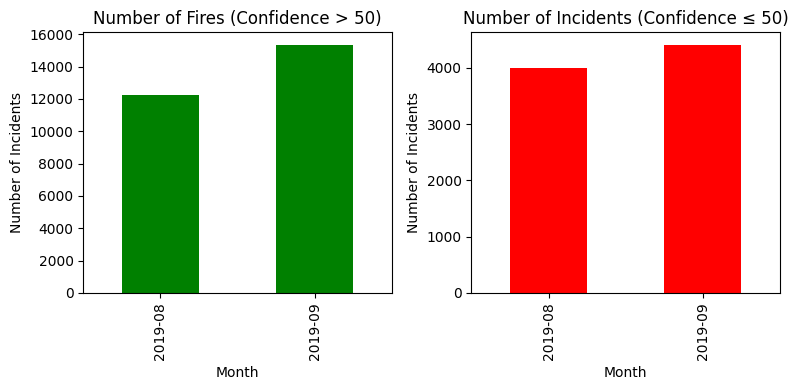

In [94]:
# Extract month from the date
forest['month'] = forest['acq_date'].dt.to_period('M')

# Calculating the counts for incidents of fire and no fire
incidents_of_fire = forest[forest['confidence'] > 50].groupby('month')['confidence'].count()
incidents_of_nofire = forest[forest['confidence'] <= 50].groupby('month')['confidence'].count()

# Creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot 1: Number of incidents with confidence > 50
incidents_of_fire.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Number of Fires (Confidence > 50)')
axes[0].set_ylabel('Number of Incidents')
axes[0].set_xlabel('Month')

# Plot 2: Number of incidents with confidence <= 50
incidents_of_nofire.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Number of Incidents (Confidence ≤ 50)')
axes[1].set_ylabel('Number of Incidents')
axes[1].set_xlabel('Month')

# Adjust layout
plt.tight_layout()
plt.show()

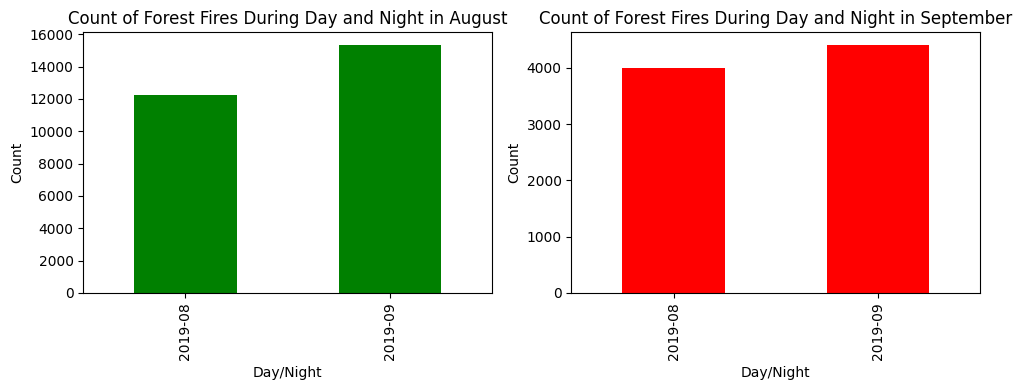

<Figure size 640x480 with 0 Axes>

In [95]:
#  Extract month from the date
forest['month'] = forest['acq_date'].dt.month

# Filter the DataFrame
filtered_data = forest[(forest['confidence'] > 50) & (forest['month'] == 8)]

# Group by 'daynight' and count the occurrences
count_data = filtered_data['daynight'].value_counts()



# Creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Number of incidents with confidence > 50
incidents_of_fire.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Count of Forest Fires During Day and Night in August')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Day/Night')

# Plot 2: Number of incidents with confidence <= 50
incidents_of_nofire.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Count of Forest Fires During Day and Night in September')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Day/Night')

# Adjust layout
plt.tight_layout()
plt.show()
# Display the plot
plt.tight_layout()
plt.show()

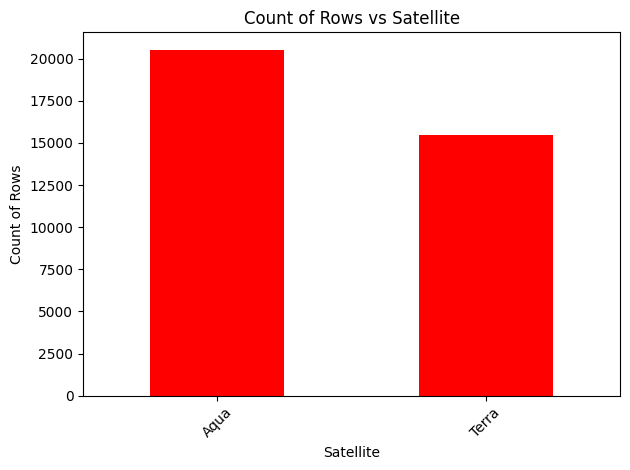

In [97]:
# Count occurrences of each satellite
satellite_counts = forest['satellite'].value_counts()

# Plot
satellite_counts.plot(kind='bar', color='red')
plt.xlabel('Satellite')
plt.ylabel('Count of Rows')
plt.title('Count of Rows vs Satellite')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [98]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,month
0,-11.8070,142.0583,313.0,1.0,2019-08-01,5.600000e-08,1,48,297.3,6.6,1,0,8
1,-11.7924,142.0850,319.3,1.0,2019-08-01,5.600000e-08,1,71,297.3,11.3,1,0,8
2,-12.8398,132.8744,311.6,3.1,2019-08-01,5.700000e-08,1,42,298.7,23.1,1,0,8
3,-14.4306,143.3035,310.1,1.1,2019-08-01,5.700000e-08,1,33,296.1,6.5,1,0,8
4,-12.4953,131.4897,310.3,4.0,2019-08-01,5.700000e-08,1,36,298.8,27.6,1,0,8


In [99]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

In [100]:
# Renaming columns for better understanding

forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [101]:
# Now I mentioned we will be converting scan column to categorical type, we will be doing this using binning method.
# Range for this columns was 1 to 4.8

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,month,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,5.600000e-08,1,48,297.3,6.6,1,0,8,True,False,False,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,5.600000e-08,1,71,297.3,11.3,1,0,8,True,False,False,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,5.700000e-08,1,42,298.7,23.1,1,0,8,True,False,False,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,5.700000e-08,1,33,296.1,6.5,1,0,8,True,False,False,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,5.700000e-08,1,36,298.8,27.6,1,0,8,True,False,False,4


In [ ]:
# Converting the datatype to datetype from string or numpy.

forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [ ]:
# Now we will be dropping scan column and handle date type data - we can extract useful information from these datatypes 
# just like we do with categorical data.

forest = forest.drop(['scan'], axis = 1)

In [102]:
forest['year'] = forest['acq_date'].dt.year

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,month,type_0,type_2,type_3,scan_binned,year
0,-11.8070,142.0583,313.0,1.0,2019-08-01,5.600000e-08,1,48,297.3,6.6,1,0,8,True,False,False,1,2019
1,-11.7924,142.0850,319.3,1.0,2019-08-01,5.600000e-08,1,71,297.3,11.3,1,0,8,True,False,False,1,2019
2,-12.8398,132.8744,311.6,3.1,2019-08-01,5.700000e-08,1,42,298.7,23.1,1,0,8,True,False,False,4,2019
3,-14.4306,143.3035,310.1,1.1,2019-08-01,5.700000e-08,1,33,296.1,6.5,1,0,8,True,False,False,2,2019
4,-12.4953,131.4897,310.3,4.0,2019-08-01,5.700000e-08,1,36,298.8,27.6,1,0,8,True,False,False,4,2019


In [103]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [132]:
# Convert date columns to numerical features
forest['acq_date_year'] = forest['acq_date'].dt.year
forest['acq_date_month'] = forest['acq_date'].dt.month
forest['acq_date_day'] = forest['acq_date'].dt.day

In [133]:
forest.shape

(36011, 22)

In [140]:
# Separating our target varibale:

y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31','year', 'acq_date_year', 'type_0'], axis = 1)

In [147]:
forest.head(2)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,...,month,type_0,type_2,type_3,scan_binned,year,day,acq_date_year,acq_date_month,acq_date_day
0,-11.8070,142.0583,313.0,1.0,2019-08-01,5.600000e-08,1,48,297.3,6.6,...,8,True,False,False,1,2019,1,2019,8,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,5.600000e-08,1,71,297.3,11.3,...,8,True,False,False,1,2019,1,2019,8,1


In [148]:
forest= forest.drop('acq_date', axis = 1)

<Axes: >

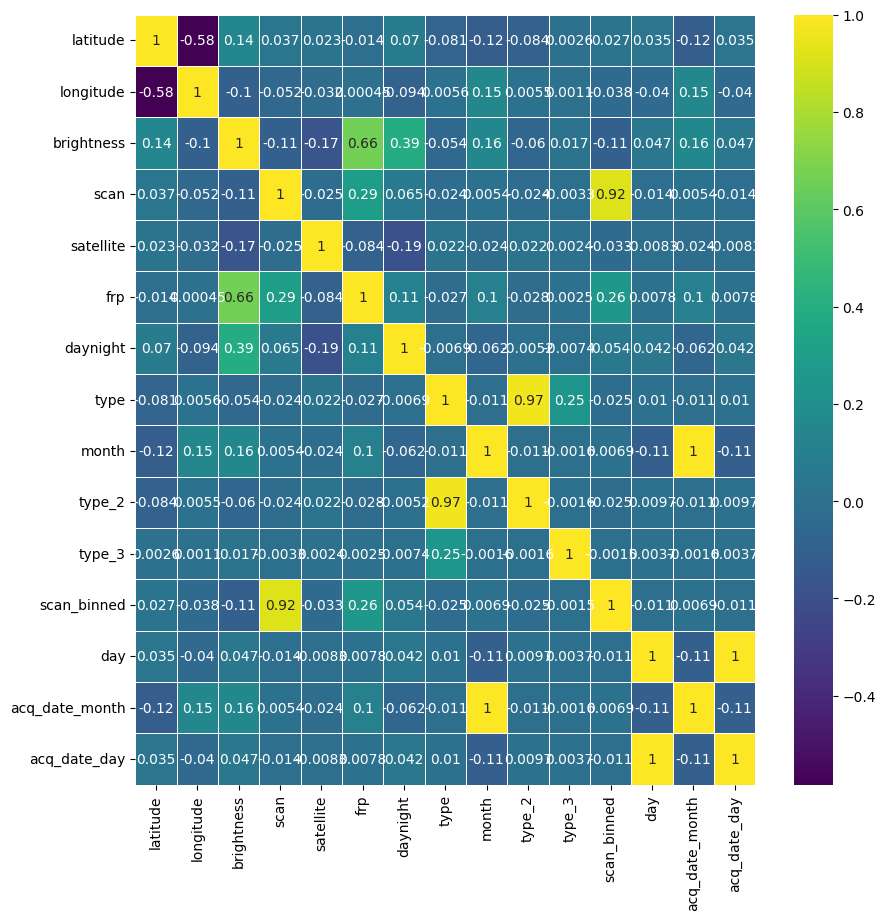

In [143]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

Training R²: 0.72
Testing R²: 0.65
Mean Squared Error: 189.68


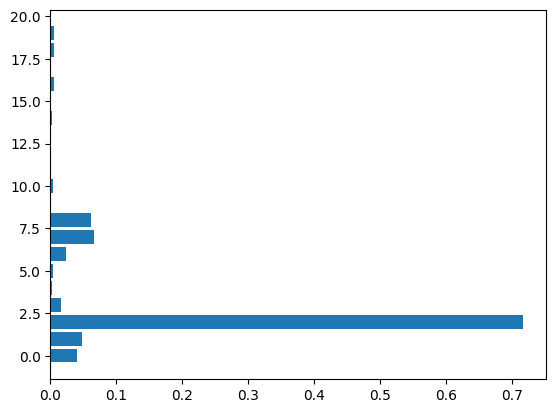

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'forest' is your DataFrame
# Define the feature matrix X and the target variable y
X = forest.drop('confidence', axis=1)
y = forest['confidence']

# Ensure X and y have the same length
assert len(X) == len(y), "X and y have inconsistent lengths!"

# Split the dataset into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
model.fit(Xtrain, ytrain)

# Make predictions on the test set
ypred = model.predict(Xtest)

# Evaluate the model
train_score = model.score(Xtrain, ytrain)  # R² on the training set
test_score = model.score(Xtest, ytest)  # R² on the test set
mse = mean_squared_error(ytest, ypred)

print(f"Training R²: {train_score:.2f}")
print(f"Testing R²: {test_score:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Feature importance plot
importance = model.feature_importances_
plt.barh(range(len(importance)), importance)
plt.show()


In [150]:
import pickle 
# Save the model to a file using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")

Model saved successfully!


In [151]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [152]:
"""
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
"""

from sklearn.model_selection import RandomizedSearchCV

In [153]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [154]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

# n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  32.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
84 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [155]:
rf_random.best_params_

{'n_estimators': 394,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [156]:
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)

In [157]:
#Fit
random_new.fit(Xtrain, ytrain)

y_pred1 = random_new.predict(Xtest)

#Checking the accuracy
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

94.79 %


In [158]:
#Checking the accuracy
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

69.42 %


# New Predictions with New data

In [165]:
import pickle

# Load the saved model
loaded_model = pickle.load(open('random_forest_model.pkl', 'rb'))

# Taking user input for each feature (modify this list to include all 20 features)
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))
brightness = float(input("Enter brightness: "))
scan = float(input("Enter scan: "))
acq_time = float(input("Enter acquisition time: "))
satellite = int(input("Enter satellite (1 for Aqua, 2 for Terra): "))
bright_t31 = float(input("Enter brightness temperature: "))
frp = float(input("Enter fire radiative power: "))
daynight = int(input("Enter day/night (1 for day, 0 for night): "))
fire_type = int(input("Enter type (e.g., 0 for unknown): "))
acq_date_year = int(input("Enter acquisition year: "))
acq_date_month = int(input("Enter acquisition month: "))
acq_date_day = int(input("Enter acquisition day: "))

additional_features = [0] * 7  # Adjust this list length based on missing features

# Combine all features into a single input array
new_data = [latitude, longitude, brightness, scan, acq_time, satellite, bright_t31, frp, daynight, fire_type, acq_date_year, acq_date_month, acq_date_day] + additional_features

# Convert to the correct shape for prediction (2D array)
new_data = np.array(new_data).reshape(1, -1)

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data)

print(f"Predicted Confidence Score: {predictions[0]:.2f}")
print(f"Predicted Confidence Score: {predictions[0]:.2f}")
if predictions[0]> 50:
    print("There is risk of Forest Fire")


Predicted Confidence Score: 33.94
Predicted Confidence Score: 33.94


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
